In [1]:
import random
import matplotlib.pyplot as plt

In [2]:
# Parameters
MAX_REPRODUCTIVE_AGE = 20
BREEDING_AGE_F = 7
BREEDING_AGE_M = 8
CARRYING_CAPACITY_INIT = 62
CARRYING_CAPACITY_DECLINE_RATE = 0.0421
YEARS_SIMULATED = 100
INITIAL_POPULATION = 25
SIMULATION_RUNS = 1000
BAMBOO_FLOWERING_YEARS = 60

In [3]:
# Mortality rates
MORTALITY_RATE_F = [40.00, 9.67, 3.14, 1.52, 1.55, 1.57, 1.60, 13.33, 13.33]
MORTALITY_RATE_M = [40.00, 9.67, 3.14, 1.52, 1.55, 1.57, 1.60, 3.45, 14.16]

# Reproduction rates
NO_OFFSPRING = 0.375
ONE_OFFSPRING = 0.583
TWO_OFFSPRING = 0.042

In [4]:
class Pandas():
    def __init__(self, age_structure, maintaining_food=False, help = False):
        self.age_structure = age_structure
        self.maintaining_food = maintaining_food
        self.help = help
    
    def initialize_population(self):
        self.population = []
        self.carrying_capacity = CARRYING_CAPACITY_INIT
        for age, count in self.age_structure.items():
            for _ in range(count):
                sex = "m" if random.random() < 0.5 else "f"
                self.population.append({"age": age, "sex": sex})
    
    def simulate_year(self):
        new_population = []
        for panda in self.population:
            # check whether panda survives in this year
            mortality_rate = MORTALITY_RATE_M[panda["age"] if panda["age"] <= 8 else 8] if panda["sex"] == "m" else MORTALITY_RATE_F[panda["age"] if panda["age"] <= 8 else 8]
            if self.help:
                mortality_rate *= 0.5
            if random.random() < mortality_rate/100:
                continue
            else:
                panda["age"] += 1
                new_population.append(panda)

        # check carrying capacity
        if self.maintaining_food:
            self.carrying_capacity = self.carrying_capacity
        else:
            self.carrying_capacity = self.carrying_capacity * (1 - CARRYING_CAPACITY_DECLINE_RATE)
        if random.random() < 1/BAMBOO_FLOWERING_YEARS:
            self.carrying_capacity = self.carrying_capacity * 0.75 # quarter of bamboo flowering

        # if the capacity is not enough, the death order is newborns, then others from oldest to youngest.
        if (len(new_population) > self.carrying_capacity):
            new_population = sorted(new_population, key=lambda x: x["age"])
            new_population = new_population[:int(self.carrying_capacity)]
            self.population = new_population

        # check whether panda reproduces in this year
        else:
            # check whether there is any male panda
            new_population = sorted(new_population, key=lambda x: x["sex"])
            reproduction_f_number = 0
            reproduction_m_number = 0
            for i in new_population:
                if i["sex"] == "m":
                    if (i["age"] - 1 >= BREEDING_AGE_M) and (i["age"] - 1 < MAX_REPRODUCTIVE_AGE):
                        reproduction_m_number += 1
                else:
                    if (i["age"] - 1 >= BREEDING_AGE_F) and (i["age"] - 1 < MAX_REPRODUCTIVE_AGE):
                        reproduction_f_number += 1
            if reproduction_f_number == 0 or reproduction_m_number == 0:
                self.population = new_population
            else:
                for _ in range(reproduction_f_number):
                    if random.random() < NO_OFFSPRING:
                        continue
                    elif random.random() < ONE_OFFSPRING + NO_OFFSPRING:
                        sex = "m" if random.random() < 0.5 else "f"
                        new_population.append({"age": 0, "sex": sex})
                    else:
                        for i in range(2):
                            sex = "m" if random.random() < 0.5 else "f"
                            new_population.append({"age": 0, "sex": sex})
                    if (len(new_population) >= self.carrying_capacity):
                        break
                self.population = new_population
        
    def simulate(self, years):
        record = []
        self.initialize_population()
        record.append(len(self.population))
        for _ in range(years):
            self.simulate_year()
            if len(self.population) == 0:
                break
            else:
                record.append(len(self.population))
        record = record + [0] * (years - len(record))
        return record
        
    def multiple_run(self):
        records = []
        for _ in range(SIMULATION_RUNS):
            records.append(self.simulate(YEARS_SIMULATED))
        return records

def plot_result(records, label):
    plt.subplot(2, 1, 1)
    plt.plot(range(YEARS_SIMULATED), [sum([i[j] for i in records]) / SIMULATION_RUNS for j in range(YEARS_SIMULATED)], label=label)
    plt.xlabel("Years")
    plt.ylabel("Average Population")
    plt.legend()
    plt.subplot(2, 1, 2)
    plt.plot(range(YEARS_SIMULATED), [sum([i[j] == 0 for i in records]) / SIMULATION_RUNS for j in range(YEARS_SIMULATED)], label=label)
    plt.xlabel("Years")
    plt.ylabel("Extinction Probability")
    plt.legend()

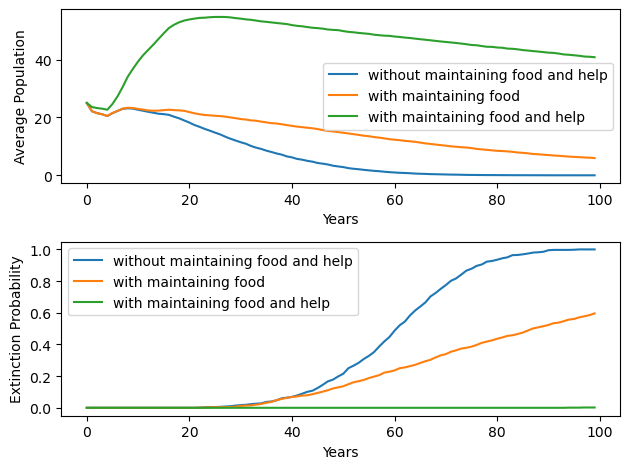

In [5]:
population1 = Pandas({0: 5, 1: 5, 2: 5, 3: 5, 4: 5})
records1 = population1.multiple_run()
population2 = Pandas({0: 5, 1: 5, 2: 5, 3: 5, 4: 5}, maintaining_food=True)
records2 = population2.multiple_run()
population3 = Pandas({0: 5, 1: 5, 2: 5, 3: 5, 4: 5}, maintaining_food=True, help=True)
records3 = population3.multiple_run()
plot_result(records1, label="without maintaining food and help")
plot_result(records2, label="with maintaining food")
plot_result(records3, label="with maintaining food and help")
plt.tight_layout()
plt.show()

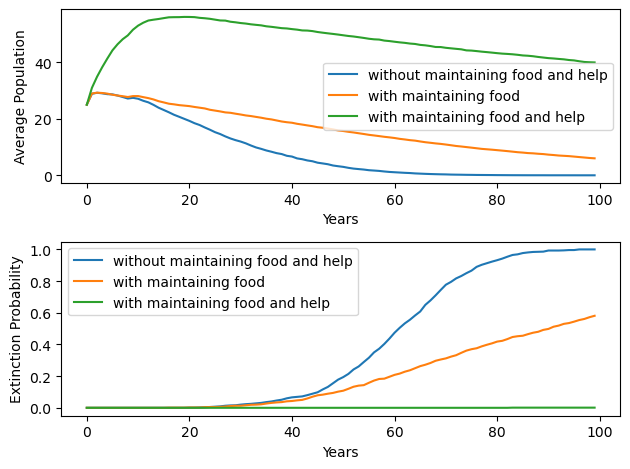

In [6]:
population4 = Pandas({7: 5, 8: 5, 9: 5, 10: 5, 11: 5})
records4 = population4.multiple_run()
population5 = Pandas({7: 5, 8: 5, 9: 5, 10: 5, 11: 5}, maintaining_food=True)
records5 = population5.multiple_run()
population6 = Pandas({7: 5, 8: 5, 9: 5, 10: 5, 11: 5}, maintaining_food=True, help=True)
records6 = population6.multiple_run()
plot_result(records4, label="without maintaining food and help")
plot_result(records5, label="with maintaining food")
plot_result(records6, label="with maintaining food and help")
plt.tight_layout()
plt.show()

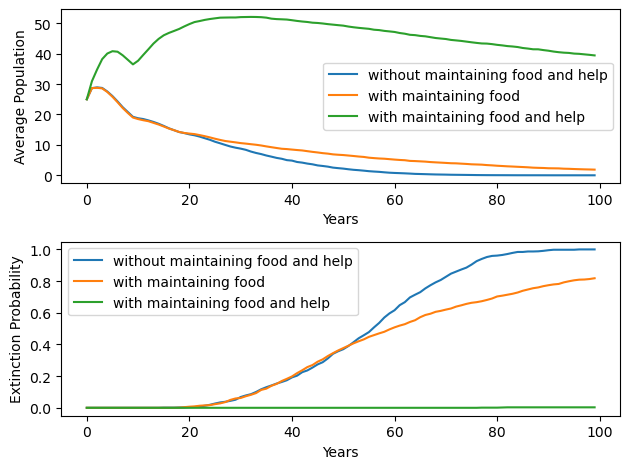

In [7]:
population7 = Pandas({13: 5, 14: 5, 15: 5, 16: 5, 17: 5})
records7 = population7.multiple_run()
population8 = Pandas({13: 5, 14: 5, 15: 5, 16: 5, 17: 5}, maintaining_food=True)
records8 = population8.multiple_run()
population9 = Pandas({13: 5, 14: 5, 15: 5, 16: 5, 17: 5}, maintaining_food=True, help=True)
records9 = population9.multiple_run()
plot_result(records7, label="without maintaining food and help")
plot_result(records8, label="with maintaining food")
plot_result(records9, label="with maintaining food and help")
plt.tight_layout()
plt.show()

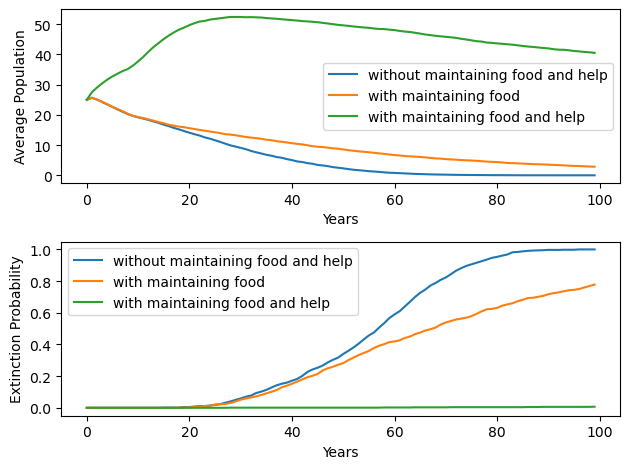

In [8]:
population10 = Pandas({0: 1, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1, 10: 1, 11: 1, 12:1, 13: 1, 14: 1, 15: 1, 16: 1, 17: 1, 18:1, 19: 1, 20: 1, 21: 1, 22: 1, 23: 1, 24: 1})
records10 = population10.multiple_run()
population11 = Pandas({0: 1, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1, 10: 1, 11: 1, 12:1, 13: 1, 14: 1, 15: 1, 16: 1, 17: 1, 18:1, 19: 1, 20: 1, 21: 1, 22: 1, 23: 1, 24: 1}, maintaining_food=True)
records11 = population11.multiple_run()
population12 = Pandas({0: 1, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1, 10: 1, 11: 1, 12:1, 13: 1, 14: 1, 15: 1, 16: 1, 17: 1, 18:1, 19: 1, 20: 1, 21: 1, 22: 1, 23: 1, 24: 1}, maintaining_food=True, help=True)
records12 = population12.multiple_run()
plot_result(records10, label="without maintaining food and help")
plot_result(records11, label="with maintaining food")
plot_result(records12, label="with maintaining food and help")
plt.tight_layout()
plt.show()